In [3]:
from autogen_core.models import UserMessage
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Assuming your Ollama server is running locally on port 11434.
ollama_model_client = OllamaChatCompletionClient(model="llama3.3")

response = await ollama_model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(response)

finish_reason='unknown' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=17, completion_tokens=8) cached=False logprobs=None thought=None


In [4]:
from typing import Literal

from pydantic import BaseModel
from autogen_ext.models.ollama import OllamaChatCompletionClient


# The response format for the agent as a Pydantic base model.
class AgentResponse(BaseModel):
    thoughts: str
    response: Literal["happy", "sad", "neutral"]


# Create an agent that uses the OpenAI GPT-4o model with the custom response format.
model_client = OllamaChatCompletionClient(
    model="llama3.3",
    model_info={  
            "vision": False,  
            "function_calling": True,  
            "json_output": True,  
        },
    response_format=AgentResponse,  # type: ignore
)

# Send a message list to the model and await the response.
messages = [
    UserMessage(content="I am happy.", source="user"),
]
response = await model_client.create(messages=messages)
assert isinstance(response.content, str)
parsed_response = AgentResponse.model_validate_json(response.content)
print(parsed_response.thoughts)
print(parsed_response.response)

ValidationError: 1 validation error for AgentResponse
  Invalid JSON: expected value at line 1 column 1 [type=json_invalid, input_value="That's wonderful to hear...lly content and upbeat?", input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/json_invalid

In [5]:
import asyncio
# pip install -U "autogen-agentchat" "autogen-ext[openai]"
import asyncio
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.ollama import OllamaChatCompletionClient

async def main() -> None:
    agent = AssistantAgent("assistant", OllamaChatCompletionClient(model="llama3.3"))
    print(await agent.run(task="Say 'Hello World!'"))

asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [6]:
from autogen_core.models import ChatCompletionClient

config = {
    "provider": "OllamaChatCompletionClient",
    "config": {"model": "llama3"},
}

client = ChatCompletionClient.load_component(config)

ValueError: Invalid

In [7]:
from autogen_ext.models.ollama import OllamaChatCompletionClient
from autogen_core.models import UserMessage
from pydantic import BaseModel


class StructuredOutput(BaseModel):
    first_name: str
    last_name: str


ollama_client = OllamaChatCompletionClient(
    model="llama3.3",
    response_format=StructuredOutput,
)
result = await ollama_client.create([UserMessage(content="Who was the first man on the moon?", source="user")])  # type: ignore
print(result)

finish_reason='unknown' content='The first person to walk on the moon was Neil Armstrong. On July 20, 1969, he stepped out of the lunar module Eagle and onto the moon\'s surface during the Apollo 11 mission. His famous words upon taking his first steps were "That\'s one small step for man, one giant leap for mankind."' usage=RequestUsage(prompt_tokens=19, completion_tokens=67) cached=False logprobs=None thought=None


In [8]:
from autogen_core.models import UserMessage
from autogen_ext.models.openai import OpenAIChatCompletionClient

model_client = OpenAIChatCompletionClient(
    model="llama3.3:latest",
    base_url="http://localhost:11434/v1",
    api_key="placeholder",
    model_info={
        "vision": False,
        "function_calling": True,
        "json_output": False,
        "family": "unknown",
    },
)

response = await model_client.create([UserMessage(content="What is the capital of France?", source="user")])
print(response)

<frozen abc>:123: RuntimeWarning: coroutine 'main' was never awaited


finish_reason='stop' content='The capital of France is Paris.' usage=RequestUsage(prompt_tokens=17, completion_tokens=8) cached=False logprobs=None thought=None


In [9]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")


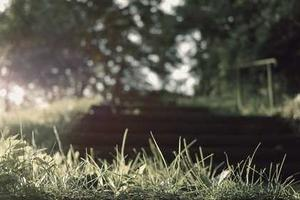

In [10]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img

In [11]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient


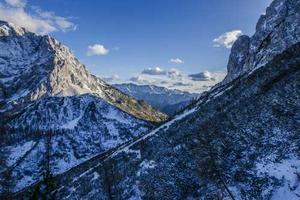

In [14]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [16]:
from autogen_ext.models.ollama import OllamaChatCompletionClient
from autogen_core.models import UserMessage
from pydantic import BaseModel


class StructuredOutput(BaseModel):
    first_name: str
    last_name: str


ollama_client = OllamaChatCompletionClient(
    model="llama3.3",
    response_format=StructuredOutput,
)
result = await ollama_client.create([UserMessage(content="Who was the first man on the moon?", source="user")])  # type: ignore
print(result)

finish_reason='unknown' content='The first man to walk on the Moon was Neil Armstrong, an American astronaut and commander of the Apollo 11 mission. On July 20, 1969, Armstrong stepped out of the lunar module Eagle and onto the Moon\'s surface, famously declaring "That\'s one small step for man, one giant leap for mankind" as he became the first person to set foot on another celestial body.\n\nArmstrong was followed by Edwin "Buzz" Aldrin, who also walked on the Moon during the Apollo 11 mission. Michael Collins remained in orbit around the Moon in the command module Columbia while Armstrong and Aldrin descended to the lunar surface.\n\nNeil Armstrong\'s historic moonwalk marked a major milestone in space exploration and paved the way for future human spaceflight missions.' usage=RequestUsage(prompt_tokens=19, completion_tokens=153) cached=False logprobs=None thought=None


In [17]:
import asyncio
from autogen_agentchat.agents import AssistantAgent
from autogen_ext.models.ollama import OllamaChatCompletionClient

async def main() -> None:
    agent = AssistantAgent("assistant", OllamaChatCompletionClient(model="llama3.3"))
    print(await agent.run(task="Say 'Hello World!'"))

asyncio.run(main())

RuntimeError: asyncio.run() cannot be called from a running event loop

In [21]:
from dataclasses import dataclass

from autogen_core import (
    AgentId,
    DefaultTopicId,
    MessageContext,
    RoutedAgent,
    SingleThreadedAgentRuntime,
    default_subscription,
    message_handler,
)
from autogen_core.model_context import BufferedChatCompletionContext
from autogen_core.models import (
    AssistantMessage,
    ChatCompletionClient,
    SystemMessage,
    UserMessage,
)
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [27]:
import asyncio

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Create an OpenAI model client.
model_client = OllamaChatCompletionClient(
    model="qwen2.5:72b",
    # api_key="sk-...", # Optional if you have an OPENAI_API_KEY env variable set.
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=text_termination)

In [28]:
result = await team.run(task="Write a short poem about the fall season.")
print(result)

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=29, completion_tokens=84), metadata={}, content="Leaves whisper in gold and scarlet hues,\nDancing with the cool autumn breeze.\nPumpkins nestle in fields, like earthy jewels,\nAs the sun bows low, in golden seas.\n\nCrisp air carries secrets of spiced cider,\nAnd the rustle of feet on crunchy paths.\nEach gust a story, each chill a reminder,\nOf fall's gentle grip, as summer withdraws.", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=124, completion_tokens=129), metadata={}, content='Your poem captures the essence of fall beautifully with vivid imagery and sensory details. The use of colors like "gold and scarlet" and the metaphors such as "earthly jewels" and "golden seas" paint a rich picture. The lines about spiced cide

In [29]:
# When running inside a script, use a async main function and call it from `asyncio.run(...)`.
await team.reset()  # Reset the team for a new task.
async for message in team.run_stream(task="Write a short poem about the fall season."):  # type: ignore
    if isinstance(message, TaskResult):
        print("Stop Reason:", message.stop_reason)
    else:
        print(message)

source='user' models_usage=None metadata={} content='Write a short poem about the fall season.' type='TextMessage'
source='primary' models_usage=RequestUsage(prompt_tokens=29, completion_tokens=79) metadata={} content='Leaves whisper in gold and scarlet hues,\nCrisp air dances with each gentle breeze.\nPumpkins glow under autumn’s light,\nWhile squirrels scamper, storing winter’s feast.\n\nThe sun sets early, painting skies so vast,\nShadows grow long as days grow short.\nIn the fall, nature’s rhythm slows,\nA season of change, a time to sort.' type='TextMessage'
source='critic' models_usage=RequestUsage(prompt_tokens=119, completion_tokens=232) metadata={} content='Your poem captures the essence of fall beautifully, with vivid imagery and a gentle rhythm. Here are a few suggestions to enhance it further:\n\n1. **Line 3**: Consider replacing "glow" with "nestle" or "sit" to create a more grounded image.\n2. **Line 7**: You might try "In the fall, nature’s pulse slows" for a slight vari

In [2]:
await team.reset()  # Reset the team for a new task.
await Console(team.run_stream(task="Write a short poem about the fall season."))  # Stream the messages to the console.

---------- user ----------
Write a short poem about the fall season.
---------- primary ----------
In the embrace of autumn's sigh,
Leaves whisper to the cloudy sky.
Gold and crimson, a fiery cascade,
Each one a secret, gently laid.

Chill dances on the morning air,
Frost kisses the ground with silver care.
Pumpkins grin in fields so wide,
Under a sun that seems to hide.

Smoke curls from chimneys, scents of spice,
Cozy blankets, warm and nice.
Fall, a season of sweet farewell,
In every leaf, a story tells.
---------- critic ----------
Your poem captures the essence of fall beautifully, with vivid imagery and a gentle rhythm. Here are a few suggestions to enhance it further:

1. Consider varying the line lengths slightly more to add a dynamic feel.
2. You might want to introduce a metaphor or simile to deepen the imagery, perhaps comparing the leaves to something that enhances their fiery cascade.
3. The transition from "Frost kisses the ground with silver care" to "Pumpkins grin in fi

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=29, completion_tokens=102), metadata={}, content="In the embrace of autumn's sigh,\nLeaves whisper to the cloudy sky.\nGold and crimson, a fiery cascade,\nEach one a secret, gently laid.\n\nChill dances on the morning air,\nFrost kisses the ground with silver care.\nPumpkins grin in fields so wide,\nUnder a sun that seems to hide.\n\nSmoke curls from chimneys, scents of spice,\nCozy blankets, warm and nice.\nFall, a season of sweet farewell,\nIn every leaf, a story tells.", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=142, completion_tokens=155), metadata={}, content='Your poem captures the essence of fall beautifully, with vivid imagery and a gentle rhythm. Here are a few suggestions to enhance it further:\n\n1. Consider

In [3]:
await team.reset()  # Reset the team for the next run.

In [4]:
# Create a new team with an external termination condition.
external_termination = ExternalTermination()
team = RoundRobinGroupChat(
    [primary_agent, critic_agent],
    termination_condition=external_termination | text_termination,  # Use the bitwise OR operator to combine conditions.
)

# Run the team in a background task.
run = asyncio.create_task(Console(team.run_stream(task="Write a short poem about the fall season.")))

# Wait for some time.
await asyncio.sleep(0.1)

# Stop the team.
external_termination.set()

# Wait for the team to finish.
await run

---------- user ----------
Write a short poem about the fall season.
---------- primary ----------
Leaves whisper to the crisp air,  
A symphony of russet and gold,  
Each gust a gentle usher,  
Of stories once bold.

Pumpkins grin in fields so vast,  
Cider warms with spices rare,  
Autumn's breath, a fleeting dance,  
In the cool, clear atmosphere.


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=29, completion_tokens=68), metadata={}, content="Leaves whisper to the crisp air,  \nA symphony of russet and gold,  \nEach gust a gentle usher,  \nOf stories once bold.\n\nPumpkins grin in fields so vast,  \nCider warms with spices rare,  \nAutumn's breath, a fleeting dance,  \nIn the cool, clear atmosphere.", type='TextMessage')], stop_reason='External termination requested')

In [5]:
await Console(team.run_stream())  # Resume the team to continue the last task.

---------- critic ----------
Your poem captures the essence of fall beautifully, with vivid imagery and a gentle rhythm that reflects the season's mood. The use of "whisper" and "gust" to describe the leaves and wind adds a sensory depth, making the scene feel alive. The mention of pumpkins and spiced cider also evokes strong associations with autumn traditions. 

One suggestion could be to consider adding a line or two that might touch on the emotional aspect often associated with fall, such as nostalgia or preparation for the coming winter. This can deepen the poem's connection to human experience. Here’s a slight revision:

Leaves whisper to the crisp air,  
A symphony of russet and gold,  
Each gust a gentle usher,  
Of stories once bold.

Pumpkins grin in fields so vast,  
Cider warms with spices rare,  
Autumn's breath, a fleeting dance,  
In the cool, clear atmosphere,  
Where memories linger softly,  
And hearts prepare for winter’s air.

Feel free to adjust as you see fit! APP

TaskResult(messages=[TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=108, completion_tokens=218), metadata={}, content='Your poem captures the essence of fall beautifully, with vivid imagery and a gentle rhythm that reflects the season\'s mood. The use of "whisper" and "gust" to describe the leaves and wind adds a sensory depth, making the scene feel alive. The mention of pumpkins and spiced cider also evokes strong associations with autumn traditions. \n\nOne suggestion could be to consider adding a line or two that might touch on the emotional aspect often associated with fall, such as nostalgia or preparation for the coming winter. This can deepen the poem\'s connection to human experience. Here’s a slight revision:\n\nLeaves whisper to the crisp air,  \nA symphony of russet and gold,  \nEach gust a gentle usher,  \nOf stories once bold.\n\nPumpkins grin in fields so vast,  \nCider warms with spices rare,  \nAutumn\'s breath, a fleeting dance,  \nIn the cool, cl

In [6]:
# The new task is to translate the same poem to Chinese Tang-style poetry.
await Console(team.run_stream(task="将这首诗用中文唐诗风格写一遍。"))

---------- user ----------
将这首诗用中文唐诗风格写一遍。
---------- primary ----------
秋风轻语叶纷飞，
金红交响映斜晖。
每阵清风轻轻送，
往昔故事心中回。

南瓜笑开田野阔，
香料苹果酒暖心扉。
秋之息，瞬息舞，
凉爽空气透心肺，
旧梦依稀情未了，
冬意渐浓待轮回。
---------- critic ----------
你的中文唐诗风格版本非常出色，既保留了原诗的意境，又融入了唐诗特有的韵律和情感表达。以下是一些小建议，以进一步增强其古典美感：

1. **韵脚调整**：可以考虑更紧密地遵循传统五言或七言绝句的韵律。
2. **意象精炼**：适当简化一些意象，使诗歌更加凝练。

以下是稍作修改后的版本：

秋风轻语叶纷飞，
金红交响映斜晖。
清风吹送旧故事，
往昔情景心中回。

南瓜笑开田野阔，
香料酒暖人心扉。
秋之舞，瞬息间，
凉爽空气透心肺。
旧梦依稀情未了，
冬意渐浓待轮回。

希望这些建议能对你有所帮助。如果你觉得这些改动合适，请回复“APPROVE”。


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='将这首诗用中文唐诗风格写一遍。', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=334, completion_tokens=73), metadata={}, content='秋风轻语叶纷飞，\n金红交响映斜晖。\n每阵清风轻轻送，\n往昔故事心中回。\n\n南瓜笑开田野阔，\n香料苹果酒暖心扉。\n秋之息，瞬息舞，\n凉爽空气透心肺，\n旧梦依稀情未了，\n冬意渐浓待轮回。', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=418, completion_tokens=189), metadata={}, content='你的中文唐诗风格版本非常出色，既保留了原诗的意境，又融入了唐诗特有的韵律和情感表达。以下是一些小建议，以进一步增强其古典美感：\n\n1. **韵脚调整**：可以考虑更紧密地遵循传统五言或七言绝句的韵律。\n2. **意象精炼**：适当简化一些意象，使诗歌更加凝练。\n\n以下是稍作修改后的版本：\n\n秋风轻语叶纷飞，\n金红交响映斜晖。\n清风吹送旧故事，\n往昔情景心中回。\n\n南瓜笑开田野阔，\n香料酒暖人心扉。\n秋之舞，瞬息间，\n凉爽空气透心肺。\n旧梦依稀情未了，\n冬意渐浓待轮回。\n\n希望这些建议能对你有所帮助。如果你觉得这些改动合适，请回复“APPROVE”。', type='TextMessage')], stop_reason="Text 'APPROVE' mentioned")

In [7]:
# Create a cancellation token.
cancellation_token = CancellationToken()

# Use another coroutine to run the team.
run = asyncio.create_task(
    team.run(
        task="Translate the poem to Spanish.",
        cancellation_token=cancellation_token,
    )
)

# Cancel the run.
cancellation_token.cancel()

try:
    result = await run  # This will raise a CancelledError.
except asyncio.CancelledError:
    print("Task was cancelled.")

Task was cancelled.


In [9]:
from typing import Callable, Sequence

from autogen_agentchat.agents import BaseChatAgent
from autogen_agentchat.base import Response
from autogen_agentchat.conditions import MaxMessageTermination
from autogen_agentchat.messages import ChatMessage
from autogen_agentchat.teams import SelectorGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.ollama import OllamaChatCompletionClient


class ArithmeticAgent(BaseChatAgent):
    def __init__(self, name: str, description: str, operator_func: Callable[[int], int]) -> None:
        super().__init__(name, description=description)
        self._operator_func = operator_func
        self._message_history: List[ChatMessage] = []

    @property
    def produced_message_types(self) -> Sequence[type[ChatMessage]]:
        return (TextMessage,)

    async def on_messages(self, messages: Sequence[ChatMessage], cancellation_token: CancellationToken) -> Response:
        # Update the message history.
        # NOTE: it is possible the messages is an empty list, which means the agent was selected previously.
        self._message_history.extend(messages)
        # Parse the number in the last message.
        assert isinstance(self._message_history[-1], TextMessage)
        number = int(self._message_history[-1].content)
        # Apply the operator function to the number.
        result = self._operator_func(number)
        # Create a new message with the result.
        response_message = TextMessage(content=str(result), source=self.name)
        # Update the message history.
        self._message_history.append(response_message)
        # Return the response.
        return Response(chat_message=response_message)

    async def on_reset(self, cancellation_token: CancellationToken) -> None:
        pass

In [11]:
async def run_number_agents() -> None:
    # Create agents for number operations.
    add_agent = ArithmeticAgent("add_agent", "Adds 1 to the number.", lambda x: x + 1)
    multiply_agent = ArithmeticAgent("multiply_agent", "Multiplies the number by 2.", lambda x: x * 2)
    subtract_agent = ArithmeticAgent("subtract_agent", "Subtracts 1 from the number.", lambda x: x - 1)
    divide_agent = ArithmeticAgent("divide_agent", "Divides the number by 2 and rounds down.", lambda x: x // 2)
    identity_agent = ArithmeticAgent("identity_agent", "Returns the number as is.", lambda x: x)

    # The termination condition is to stop after 10 messages.
    termination_condition = MaxMessageTermination(10)

    # Create a selector group chat.
    selector_group_chat = SelectorGroupChat(
        [add_agent, multiply_agent, subtract_agent, divide_agent, identity_agent],
        model_client=OllamaChatCompletionClient(model="llama3.3"),
        termination_condition=termination_condition,
        allow_repeated_speaker=True,  # Allow the same agent to speak multiple times, necessary for this task.
        selector_prompt=(
            "Available roles:\n{roles}\nTheir job descriptions:\n{participants}\n"
            "Current conversation history:\n{history}\n"
            "Please select the most appropriate role for the next message, and only return the role name."
        ),
    )

    # Run the selector group chat with a given task and stream the response.
    task: List[ChatMessage] = [
        TextMessage(content="Apply the operations to turn the given number into 25.", source="user"),
        TextMessage(content="10", source="user"),
    ]
    stream = selector_group_chat.run_stream(task=task)
    await Console(stream)


# Use asyncio.run(run_number_agents()) when running in a script.
await run_number_agents()

---------- user ----------
Apply the operations to turn the given number into 25.
---------- user ----------
10
---------- add_agent ----------
11
---------- multiply_agent ----------
22
---------- add_agent ----------
23
---------- add_agent ----------
24
---------- add_agent ----------
25
---------- identity_agent ----------
25
---------- divide_agent ----------
12
---------- multiply_agent ----------
24


In [ ]:
from autogen_ext.models.ollama import OllamaChatCompletionClient
from autogen_core.models import UserMessage

ollama_client = OllamaChatCompletionClient(model="llama3.3",)

result = await ollama_client.create([UserMessage(content="What is the capital of France?", source="user")])  # type: ignore
print(result)

In [8]:
from typing import AsyncGenerator, List, Sequence

from autogen_agentchat.agents import BaseChatAgent
from autogen_agentchat.base import Response
from autogen_agentchat.messages import AgentEvent, ChatMessage, TextMessage
from autogen_core import CancellationToken


class CountDownAgent(BaseChatAgent):
    def __init__(self, name: str, count: int = 3):
        super().__init__(name, "A simple agent that counts down.")
        self._count = count

    @property
    def produced_message_types(self) -> Sequence[type[ChatMessage]]:
        return (TextMessage,)

    async def on_messages(self, messages: Sequence[ChatMessage], cancellation_token: CancellationToken) -> Response:
        # Calls the on_messages_stream.
        response: Response | None = None
        async for message in self.on_messages_stream(messages, cancellation_token):
            if isinstance(message, Response):
                response = message
        assert response is not None
        return response

    async def on_messages_stream(
        self, messages: Sequence[ChatMessage], cancellation_token: CancellationToken
    ) -> AsyncGenerator[AgentEvent | ChatMessage | Response, None]:
        inner_messages: List[AgentEvent | ChatMessage] = []
        for i in range(self._count, 0, -1):
            msg = TextMessage(content=f"{i}...", source=self.name)
            inner_messages.append(msg)
            yield msg
        # The response is returned at the end of the stream.
        # It contains the final message and all the inner messages.
        yield Response(chat_message=TextMessage(content="Done!", source=self.name), inner_messages=inner_messages)

    async def on_reset(self, cancellation_token: CancellationToken) -> None:
        pass


async def run_countdown_agent() -> None:
    # Create a countdown agent.
    countdown_agent = CountDownAgent("countdown")

    # Run the agent with a given task and stream the response.
    async for message in countdown_agent.on_messages_stream([], CancellationToken()):
        if isinstance(message, Response):
            print(message.chat_message.content)
        else:
            print(message.content)


# Use asyncio.run(run_countdown_agent()) when running in a script.
await run_countdown_agent()

3...
2...
1...
Done!


In [18]:
async def get_weather(city: str) -> str:  
    return f"The weather in {city} is 73 degrees and Sunny."  

In [22]:
from autogen_agentchat.agents import AssistantAgent  
from autogen_ext.models.openai import OpenAIChatCompletionClient  
from autogen_ext.models.ollama import OllamaChatCompletionClient

weather_agent = AssistantAgent(  
    name="weather_agent",  
    model_client=OllamaChatCompletionClient(  
        model="qwen2.5-coder:0.5b",  
        model_info={  
            "vision": False,  
            "function_calling": True,  
            "json_output": True,  
        },  
        base_url="http://localhost:11434"  # Ollama API endpoint  
    ),  
    tools=[get_weather],  
)  

In [23]:
from autogen_agentchat.teams import RoundRobinGroupChat  

agent_team = RoundRobinGroupChat([weather_agent], max_turns=1)  

In [24]:
from autogen_agentchat.ui import Console  

async def main() -> None:  
    while True:  
        user_input = input("Enter a message (type 'exit' to leave): ")  
        if user_input.strip().lower() == "exit":  
            break  
        stream = agent_team.run_stream(task=user_input)  
        await Console(stream)  

if __name__ == "__main__":  
    import asyncio  
    asyncio.run(main())  

RuntimeError: asyncio.run() cannot be called from a running event loop